In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import operator
import os
print(os.listdir("../content"))

['.config', 'ratings.dat', 'users.dat', 'movies.dat', 'sample_data']


In [74]:
mov_dt=pd.read_csv('../content/movies.dat', sep = '::', engine='python')
mov_dt.columns =['MovieIDs','MovieName','Category']
mov_dt.dropna(inplace=True)
mov_dt.head()

,MovieIDs,MovieName,Category
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short
3,91,Le manoir du diable (1896),Short|Horror
4,131,Une nuit terrible (1896),Short|Comedy|Horror
5,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi


In [75]:
mov_dt.columns = ["ID", "Title", "Genre"]
print(mov_dt.head())

    ID                                Title  \
0   10  La sortie des usines Lumière (1895)   
1   12        The Arrival of a Train (1896)   
3   91           Le manoir du diable (1896)   
4  131             Une nuit terrible (1896)   
5  417            A Trip to the Moon (1902)   

                                          Genre  
0                             Documentary|Short  
1                             Documentary|Short  
3                                  Short|Horror  
4                           Short|Comedy|Horror  
5  Short|Action|Adventure|Comedy|Fantasy|Sci-Fi  


In [76]:
rat_dt = pd.read_csv("../content/ratings.dat",sep='::', engine='python')
rat_dt.columns =['ID','MovieID','Ratings','TimeStamp']
rat_dt.dropna(inplace=True)
rat_dt.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [77]:
mov_dt.columns = ["ID", "Title", "Genre"]
print(mov_dt.head())

    ID                                Title  \
0   10  La sortie des usines Lumière (1895)   
1   12        The Arrival of a Train (1896)   
3   91           Le manoir du diable (1896)   
4  131             Une nuit terrible (1896)   
5  417            A Trip to the Moon (1902)   

                                          Genre  
0                             Documentary|Short  
1                             Documentary|Short  
3                                  Short|Horror  
4                           Short|Comedy|Horror  
5  Short|Action|Adventure|Comedy|Fantasy|Sci-Fi  


In [78]:
rat_dt = pd.read_csv("../content/ratings.dat",sep='::', engine='python')
rat_dt.columns =['ID','MovieID','Ratings','TimeStamp']
rat_dt.dropna(inplace=True)
rat_dt.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [79]:
rat_dt.columns = ["User", "ID", "Ratings", "Timestamp"]
print(rat_dt.head())


   User    ID  Ratings  Timestamp
0     1   661        3  978302109
1     1   914        3  978301968
2     1  3408        4  978300275
3     1  2355        5  978824291
4     1  1197        3  978302268


In [80]:
data = pd.merge(mov_dt, rat_dt, on=["ID", "ID"])
print(data.head())

   ID                                Title              Genre  User  Ratings  \
0  10  La sortie des usines Lumière (1895)  Documentary|Short    13        3   
1  10  La sortie des usines Lumière (1895)  Documentary|Short    18        5   
2  10  La sortie des usines Lumière (1895)  Documentary|Short    19        5   
3  10  La sortie des usines Lumière (1895)  Documentary|Short    22        3   
4  10  La sortie des usines Lumière (1895)  Documentary|Short    36        4   

   Timestamp  
0  978201884  
1  978153344  
2  978147137  
3  980066459  
4  978211470  


In [81]:
rat_dt = data["Ratings"].value_counts()
numbers = rat_dt.index
quantity = rat_dt.values
import plotly.express as px
fig = px.pie(data, values=quantity, names=numbers)
fig.show()

In [ ]:
us_dt = pd.read_csv("../content/users.dat",sep='::',engine='python')
us_dt.columns =['UserID','Gender','Age','Occupation','Zip-code']
us_dt.dropna(inplace=True)
us_dt.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [ ]:
dt = pd.concat([mov_dt, rat_dt,us_dt], axis=1)
dt.head()

,MovieIDs,MovieName,Category,User,ID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,10.0,La sortie des usines Lumière (1895),Documentary|Short,2,499549,9,1376753198,2.0,M,56.0,16.0,70072
1,12.0,The Arrival of a Train (1896),Documentary|Short,2,1305591,8,1376742507,3.0,M,25.0,15.0,55117
3,91.0,Le manoir du diable (1896),Short|Horror,3,75314,1,1595468524,5.0,M,25.0,20.0,55455
4,131.0,Une nuit terrible (1896),Short|Comedy|Horror,3,102926,9,1590148016,6.0,F,50.0,9.0,55117
5,417.0,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi,3,114369,10,1597555347,7.0,M,35.0,1.0,06810


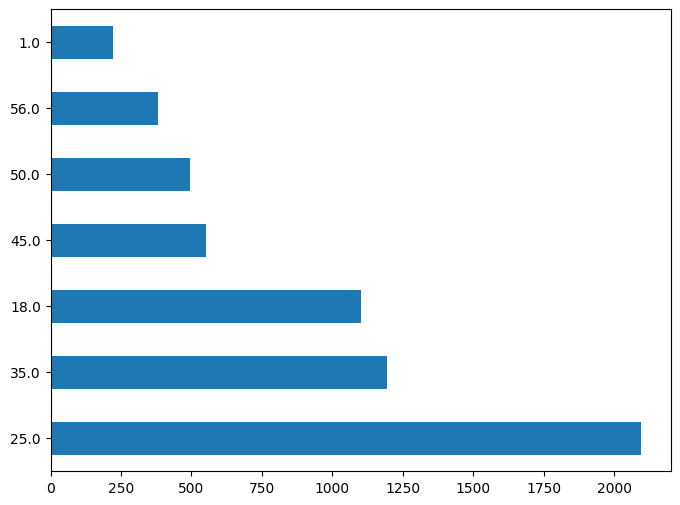

In [ ]:
dt['Age'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.show()

Text(0.5, 0, 'Age')

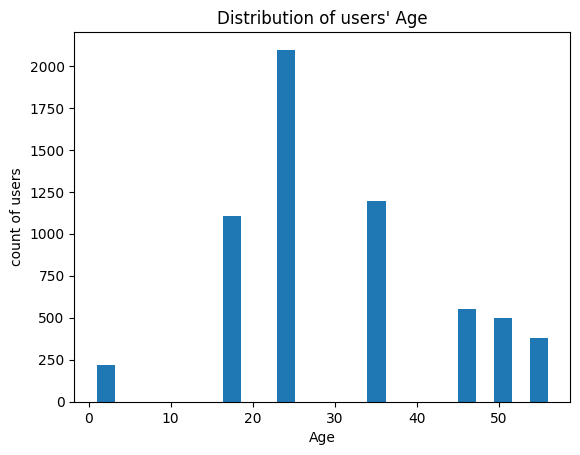

In [ ]:
dt.Age.plot.hist(bins=25)
plt.title("Distribution of users' Age")
plt.ylabel('count of users')
plt.xlabel('Age')

In [ ]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
dt['age_group'] = pd.cut(dt.Age, range(0, 81, 10), right=False, labels=labels)
dt[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
4,50.0,50-59
5,35.0,30-39
11,45.0,40-49
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


In [9]:
%matplotlib inline

import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [10]:
rat_dt_file_path = "../content/ratings.dat"
mov_dt_file_path = "../content/movies.dat"
us_dt_file_path =  "../content/users.dat"

rat_dt = pd.io.parsers.read_csv(rat_dt_file_path,
                                     names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::')
mov_dt = pd.io.parsers.read_csv(mov_dt_file_path,
                                    names=['movie_id', 'title', 'genre'], delimiter='::')
us_dt = pd.io.parsers.read_csv(us_dt_file_path,
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')

In [15]:
print(rat_dt.isnull().sum())
print(mov_dt.isnull().sum())
print(us_dt.isnull().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id     0
title        0
genre       71
dtype: int64
user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


In [16]:
print("total number of movie in data :", len(mov_dt['movie_id'].unique()))
mov_dt['year'] = mov_dt['title'].apply(lambda x: x[-5:-1])
mov_dt['year'].value_counts().head(10)


total number of movie in data : 37337


2013    2365
2014    2165
2015    2096
2016    2026
2012    1908
2017    1866
2018    1648
2019    1449
2011    1426
2010    1165
Name: year, dtype: int64

In [17]:
mov_dt['year_term'] = mov_dt['title'].apply(lambda x: x[-5:-2]+"0")
moview_year_term = mov_dt['year_term'].value_counts().sort_index()
print(moview_year_term)

1870        1
1880        1
1890        9
1900        9
1910       53
1920      182
1930      535
1940      731
1950     1071
1960     1396
1970     1913
1980     2484
1990     3190
2000     6717
2010    18114
2020      936
Name: year_term, dtype: int64


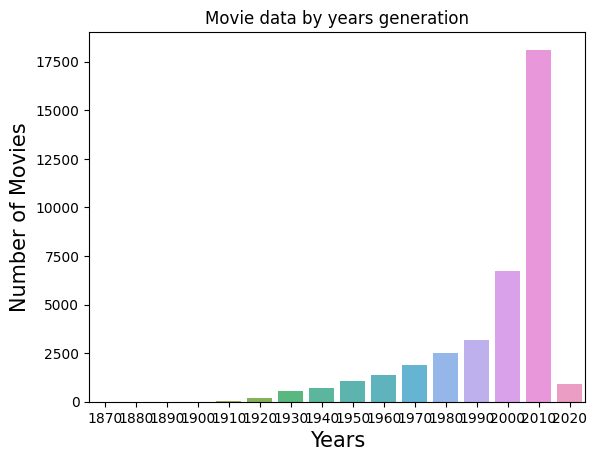

In [18]:
sns.barplot(x=moview_year_term.index, y=moview_year_term.values, alpha=0.9)
plt.title('Movie data by years generation')
plt.ylabel('Number of Movies', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.show()

### `**Print the most used genre combinations. (Top 10)**:



In [19]:
mov_dt['genre'].value_counts()[:10]

Drama                   3878
Comedy                  2260
Documentary             1595
Comedy|Drama            1436
Drama|Romance           1258
Comedy|Drama|Romance    1022
Comedy|Romance           884
Horror                   884
Horror|Thriller          601
Drama|Thriller           529
Name: genre, dtype: int64

In [20]:
genres = pd.unique(mov_dt['genre'].str.split('|', expand=True).stack())

In [21]:
df_split = mov_dt.groupby('year')['genre'].apply(lambda x: x.str.split('|', expand=True).reset_index(drop=True))

In [22]:
print("total number of user in data :", len(us_dt['user_id'].unique()))

total number of user in data : 6040


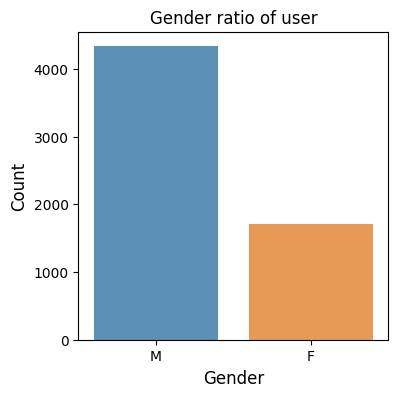

In [23]:
plt.rcParams['figure.figsize'] = [4, 4]
user_gender = us_dt['gender'].value_counts()
sns.barplot(x=user_gender.index, y=user_gender.values, alpha=0.8)
plt.title('Gender ratio of user')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [24]:
us_dt['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [25]:
def age_classification(age):
    if age == 1:
        return 'outlier'
    else:
        return str(age)[0] + "0"
        us_dt['ages'] = us_dt['age'].apply(lambda x: age_classification(x))
        user_age = user_age['ages'].value_counts()

In [37]:
print("total number of movie in data :", len(mov_dt['movie_id'].unique()))



total number of movie in data : 37337


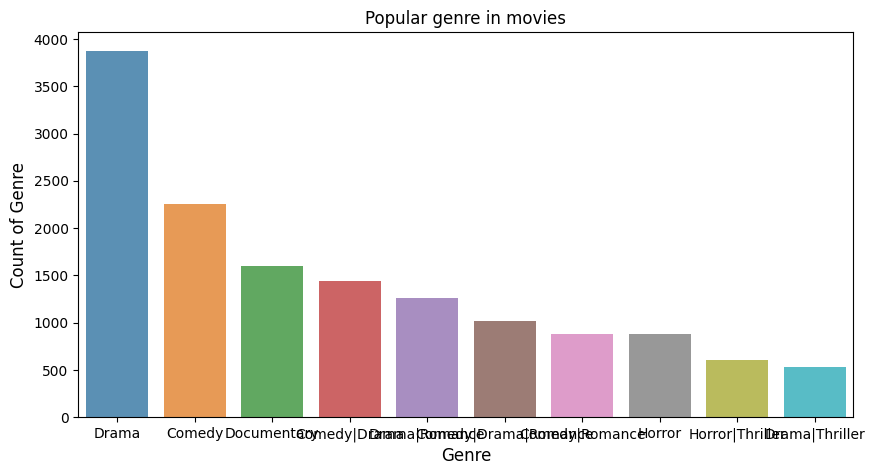

In [26]:
unique_genre_dict = mov_dt['genre'].value_counts()
unique_genre_dict = unique_genre_dict[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=unique_genre_dict.index, y=unique_genre_dict.values, alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

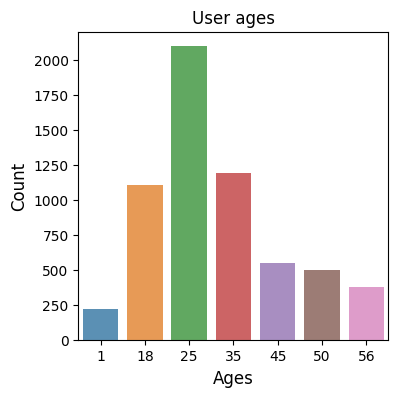

In [27]:
from pandas.core.arrays.interval import unique
user_ages = us_dt['age'].value_counts()
user_ages = user_ages[:10,]
sns.barplot(x=user_ages.index,y=user_ages.values, alpha=0.8)
plt.title('User ages')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ages', fontsize=12)
plt.show()

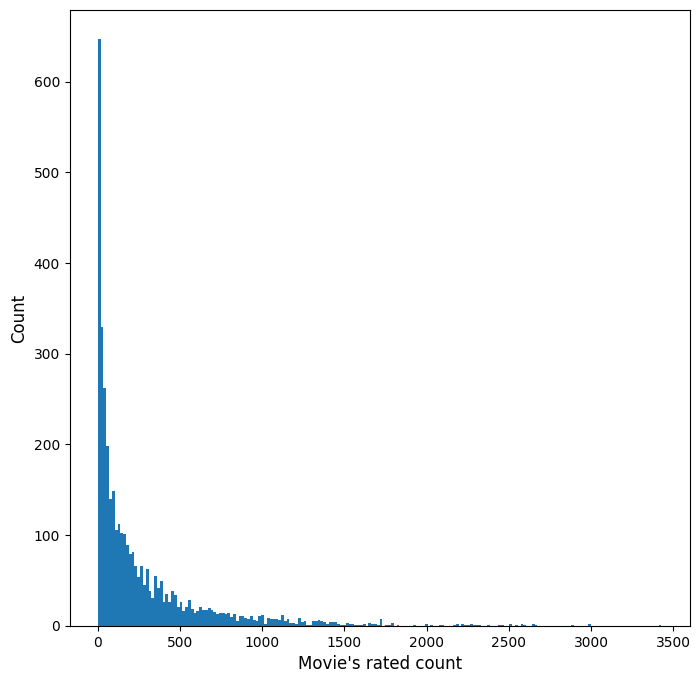

In [28]:
movie_rate_count = rat_dt.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('Count', fontsize=12)
plt.xlabel("Movie's rated count", fontsize=12)
plt.show()

In [29]:
print("total number of movie in data :", len(mov_dt['movie_id'].unique()))
print("total number of movie rated below 100 :", len(movie_rate_count[movie_rate_count < 100]))

total number of movie in data : 37337
total number of movie rated below 100 : 1687


In [30]:
movie_grouped_rating_info = rat_dt.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

In [31]:
movie_grouped_rating_info.head(5)

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


<Axes: >

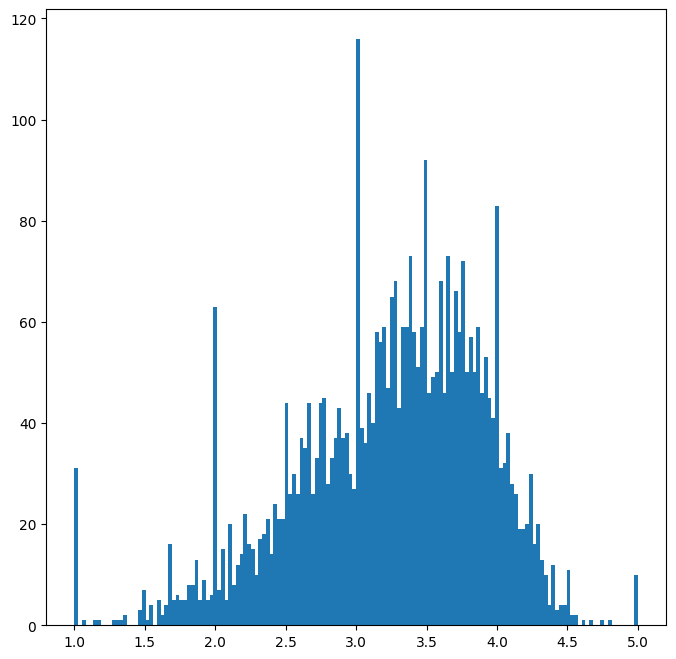

In [32]:
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

### Of the films with more than 100 ratings, print the 10 films with the highest ratings.**bold text**

In [33]:
merged_data = movie_grouped_rating_info.merge(mov_dt, on=['movie_id'], how='left')
merged_data[merged_data['rated_count'] > 100][['rating_mean', 'title']].nlargest(10, 'rating_mean')

,rating_mean,title
1839,4.560510,NaN
309,4.554558,NaN
802,4.524966,NaN
708,4.520548,NaN
49,4.517106,NaN
513,4.510417,NaN
1066,4.507937,NaN
861,4.491489,NaN
1108,4.477725,NaN
843,4.476190,NaN


1.   In the same way, analyze the ratings attribute per user group.
2. Number of movies rated by user
3.Average movie rating by user
Differences in movie scores rated by us





In [22]:
# Explore movie ratings by user.

In [34]:
user_grouped_rating_info = rat_dt.groupby('user_id')['rating'].agg(['count','mean', 'std'])
user_grouped_rating_info.columns = ['rated_count', 'rating_mean', 'rating_std']

In [35]:
user_grouped_rating_info.head()

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


In [48]:
# Print the distribution of the number of movies rated by user.

<Axes: >

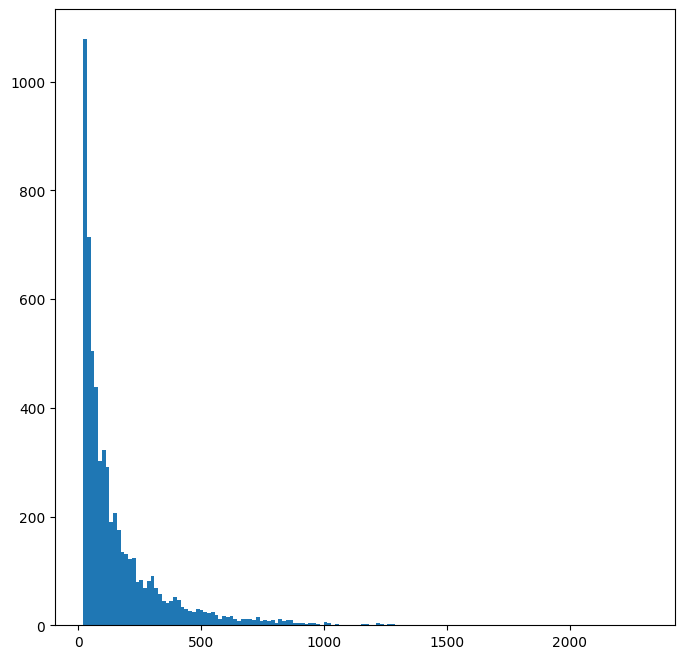

In [36]:
user_grouped_rating_info['rated_count'].hist(bins=150, grid=False)

<Axes: >

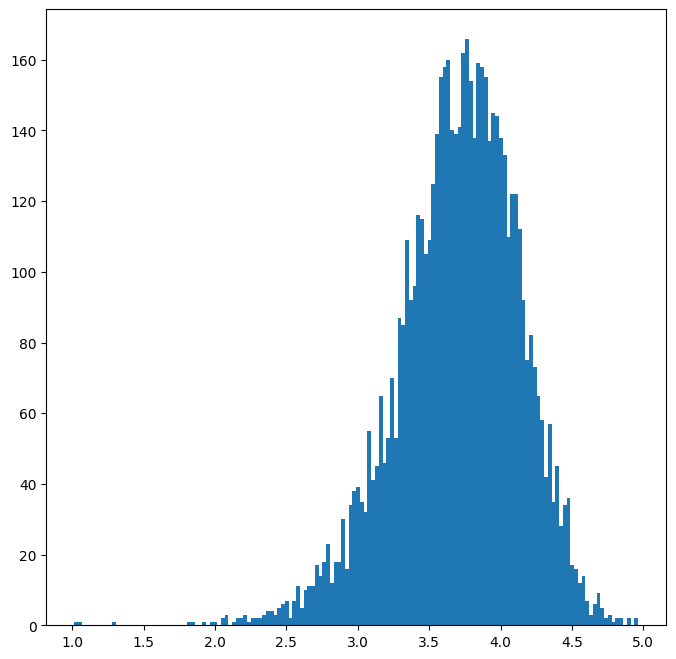

In [37]:
user_grouped_rating_info['rating_mean'].hist(bins=150, grid=False)

In [51]:
# Print the distribution of movie score deviations evaluated by user as a graph.

<Axes: >

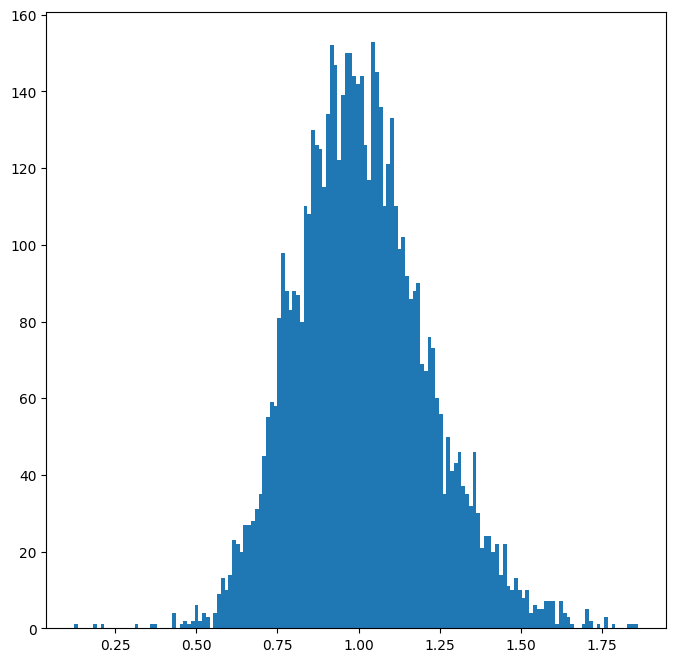

In [38]:
user_grouped_rating_info['rating_std'].hist(bins=150, grid=False)

# * [Look at the user-movie type table]








In [39]:
rat_dt.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [54]:
# Create data with user_id and movie_id as axes with the unstack() function.

In [40]:
rating_table = rat_dt[['user_id', 'movie_id', 'rating']].set_index(["user_id", "movie_id"]).unstack()
rating_table.head(10)

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
7           NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
8           4.0  NaN  NaN  3.0  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10          5.0  5.0  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9         NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  
10        NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  

[10 rows x 3706 columns]

In [56]:
# Visualize the user-movie table.

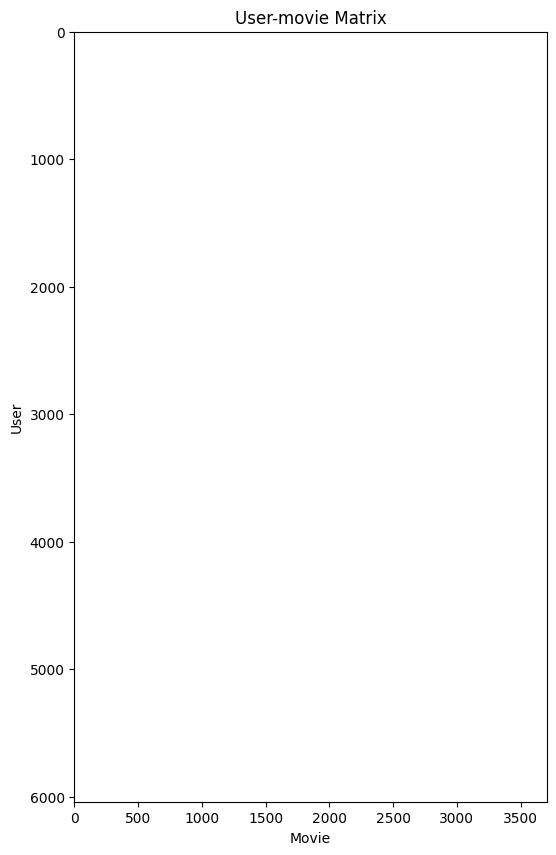

In [41]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

# Score prediction using mathematical techniques
Generate user-item matrix with blanks
 * pip install surprise




In [42]:
!pip install surprise

In [43]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
np.set_printoptions(suppress=True)

reader = Reader(rating_scale=(1, 5))


In [44]:
ratings_dict = {'item_id': [1,2,3,1,2,3,2],
                'user_id': ['a','a','a','b','b','b','c'],
                'rating': [2,4,4,2,5,4,5]}
df = pd.DataFrame(ratings_dict)
df.head(10)

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [45]:
df_matrix_table = df[['user_id', 'item_id', 'rating']].set_index(["user_id", "item_id"]).unstack().fillna(0)
df_matrix_table.head(10)

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

In [46]:
data = Dataset.load_from_df(df=df[["user_id", "item_id", "rating"]], reader=reader)
train_data = data.build_full_trainset()


In [47]:
# Train the SVD model.
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=10)
model.fit(train_data)




# Predict scores for empty spaces based on the trained model.

In [48]:
# test_data: Data used for learning or items, but not scored
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)
# The result below is the result of predicting the score of the empty space (test_data).
for _, iid, _, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "predicted rating :", predicted_rating)


Item id 1 | predicted rating : 3.653575672202801
Item id 3 | predicted rating : 3.8432579839415943



The data of the part that is evaluated as 0 (the point where the rating is 0) in the matrix used for learning.
User or item is extracted through the precondition that it must have appeared in learning.

In [49]:
test_data = train_data.build_testset()
predictions = model.test(test_data)
for _, iid, r_ui, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "real rating :", r_ui, "|", "predicted rating :", predicted_rating)

Item id 1 | real rating : 2.0 | predicted rating : 3.4792629668043213
Item id 2 | real rating : 4.0 | predicted rating : 3.8200941226126797
Item id 3 | real rating : 4.0 | predicted rating : 3.6809986819563223
Item id 1 | real rating : 2.0 | predicted rating : 3.4869024598148566
Item id 2 | real rating : 5.0 | predicted rating : 3.813487811201578
Item id 3 | real rating : 4.0 | predicted rating : 3.713927832408974
Item id 2 | real rating : 5.0 | predicted rating : 3.910152549537568


In [50]:
# This is the output of the values ​​of the matrix that were not originally empty. The real rating is the original value, and the predicted rating is the predicted value after matrix completion.
for _, iid, _, predicted_rating, _ in predictions:
    print("Item id", iid, "|", "predicted rating :", predicted_rating)

Item id 1 | predicted rating : 3.4792629668043213
Item id 2 | predicted rating : 3.8200941226126797
Item id 3 | predicted rating : 3.6809986819563223
Item id 1 | predicted rating : 3.4869024598148566
Item id 2 | predicted rating : 3.813487811201578
Item id 3 | predicted rating : 3.713927832408974
Item id 2 | predicted rating : 3.910152549537568


# [Predict the score of a movie you haven't rated yet]
Applying SVD to MovieLens Data

In [51]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rat_dt[['user_id', 'movie_id', 'rating']], reader)
train_data = data.build_full_trainset()
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))


training time of model: 19.35 seconds


Selecting target users to predict the score of a movie

In [52]:
# This is the movie rating data of the user whose user_id is 4.
target_user_id = 4
target_user_data = rat_dt[rat_dt['user_id']==target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [53]:
# Extract movie history information rated by the user with user_id 4.
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']

print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}



Select 10 movies with high expected ratings among the movies that the target user has not seen

In [54]:
# Create test data with movie information that the target user (user_id is 4) has not seen.

In [55]:
test_data = []
for index, row in mov_dt.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

In [56]:
# Predict the rating score of the target user.
target_user_predictions = model.test(test_data)

def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions,
                                                            user_id=target_user_id,
                                                            user_history=target_user_movie_rating_dict)

# Among the scores predicted by target_user_movie_predict_dict, select the Top 10 movies of the target user.

In [57]:
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                     key=operator.itemgetter(1), reverse=True)[:10]

In [58]:
# Predicted Top 10 Movies
target_user_top10_predicted

[(2130, 4.826498800939602),
 (25, 4.529251139542415),
 (1223, 4.411972477147017),
 (628, 4.285892253808746),
 (439, 4.255255405115797),
 (417, 4.1538487147658065),
 (91, 3.896209869233586),
 (1740, 3.896209869233586),
 (4099, 3.896209869233586),
 (4100, 3.896209869233586)]

In [59]:
# Save movie_title in the form of a dictionary for each movie_id to output as title information.
movie_dict = {}
for index, row in mov_dt.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

# Save movie_title in the form of a dictionary for each movie_id to output as title information.

In [60]:
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id], ":", predicted_rating)

L'inferno (1911) : 4.826498800939602
The Oxford and Cambridge University Boat Race (1895) : 4.529251139542415
Frankenstein (1910) : 4.411972477147017
The Adventures of Dollie (1908) : 4.285892253808746
The Great Train Robbery (1903) : 4.255255405115797
A Trip to the Moon (1902) : 4.1538487147658065
Le manoir du diable (1896) : 3.896209869233586
The Lonedale Operator (1911) : 3.896209869233586
His Majesty, the Scarecrow of Oz (1914) : 3.896209869233586
His Musical Career (1914) : 3.896209869233586


[Evaluation method of predictive model]
Calculate RMSE

In [62]:
# Create training data to use the SVD library. Split training and test data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rat_dt[['user_id', 'movie_id', 'rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)
# Print the RMSE of the test data.
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 47.31 seconds
RMSE of test dataset in SVD model:
RMSE: 0.8608


0.8608255774107352


[Mini Quiz - 3.6]
In the SVD example, try outputting the RMSE by changing the hyperparameters.
Let's use RMSE to find a suitable hyperparameter n_factors.
Print the RMSE graph according to the change in the hyperparameter n_factors setting.
Hyperparameter Tuning Example

In [63]:
rmse_list_by_factors = []
ttime_list_by_factors = []
for n in range(1, 15):
    train_start = time.time()
    model = SVD(n_factors=n,
                lr_all=0.005,
                reg_all=0.02,
                n_epochs=100)
    model.fit(train_data)
    train_end = time.time()
    print("training time of model: %.2f seconds" % (train_end - train_start))
    print("RMSE of test dataset in SVD model, n_factors=" + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end - train_start))
    print("------------------------------------")
print("searching n_factors is finish.")

training time of model: 40.90 seconds
RMSE of test dataset in SVD model, n_factors=1
RMSE: 0.8828
------------------------------------
training time of model: 46.70 seconds
RMSE of test dataset in SVD model, n_factors=2
RMSE: 0.8742
------------------------------------
training time of model: 41.16 seconds
RMSE of test dataset in SVD model, n_factors=3
RMSE: 0.8675
------------------------------------
training time of model: 41.38 seconds
RMSE of test dataset in SVD model, n_factors=4
RMSE: 0.8632
------------------------------------
training time of model: 42.61 seconds
RMSE of test dataset in SVD model, n_factors=5
RMSE: 0.8638
------------------------------------
training time of model: 40.84 seconds
RMSE of test dataset in SVD model, n_factors=6
RMSE: 0.8585
------------------------------------
training time of model: 41.59 seconds
RMSE of test dataset in SVD model, n_factors=7
RMSE: 0.8606
------------------------------------
training time of model: 42.97 seconds
RMSE of test data

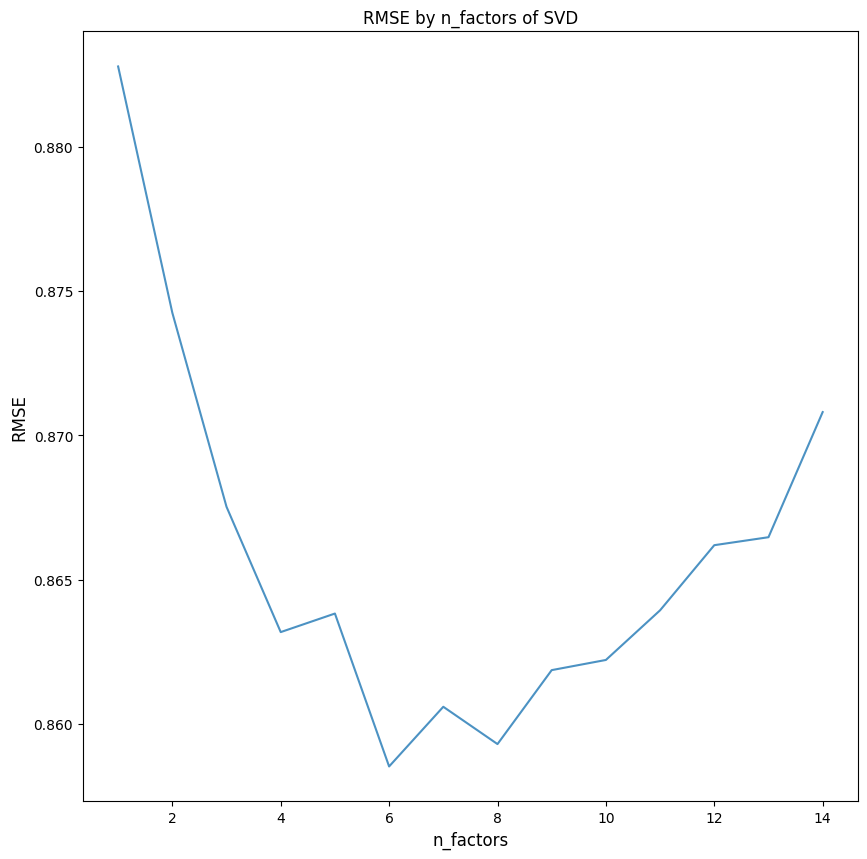

In [64]:
plt.plot(range(1, 15), rmse_list_by_factors, alpha=0.8)
plt.title('RMSE by n_factors of SVD')
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()

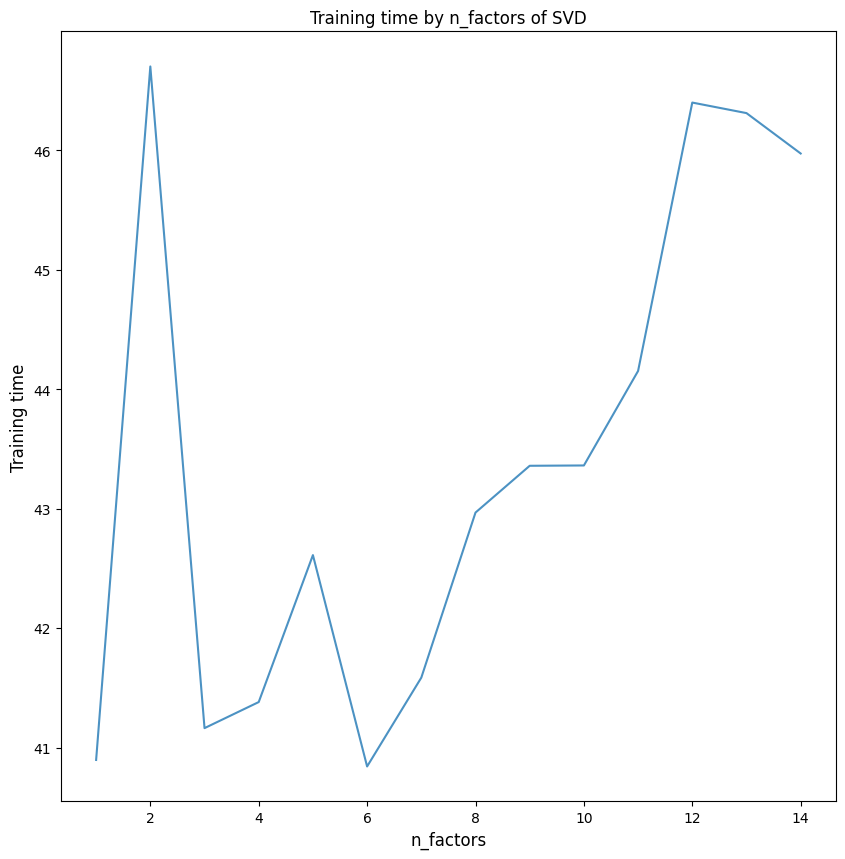

In [65]:
plt.plot(range(1, 15), ttime_list_by_factors, alpha=0.8)
plt.title('Training time by n_factors of SVD')
plt.ylabel('Training time', fontsize=12)
plt.xlabel('n_factors', fontsize=12)
plt.show()


[Visualization of comparison with actual rating]
Rating prediction step

In [60]:
# Create target user information as test data.

In [66]:
test_data = []
for index, row in mov_dt.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

In [63]:
# Predict the rating score of the target user.

In [67]:
target_user_predictions = model.test(test_data)
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
    target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions,
                                                            user_id=target_user_id,
                                                                user_history=target_user_movie_rating_dict)


In [68]:

target_user_movie_predict_dict

{8: 3.330179096829597,
 10: 3.286859463321604,
 12: 2.7022195230140533,
 25: 4.529251139542415,
 91: 3.896209869233586,
 131: 3.447125461599065,
 417: 4.1538487147658065,
 439: 4.255255405115797,
 443: 3.311119477333661,
 628: 4.285892253808746,
 833: 2.8865727054376458,
 1223: 4.411972477147017,
 1740: 3.896209869233586,
 2101: 3.5060080646952674,
 2130: 4.826498800939602,
 2354: 2.780647402911998,
 2844: 3.5974895577325916,
 3740: 2.712837403329182,
 3863: 3.4629989039268794,
 4099: 3.896209869233586,
 4100: 3.896209869233586,
 4101: 3.896209869233586,
 4210: 3.896209869233586,
 4395: 3.896209869233586,
 4413: 3.896209869233586,
 4457: 3.896209869233586,
 4518: 3.896209869233586,
 4546: 3.896209869233586,
 4936: 3.896209869233586,
 4972: 3.896209869233586,
 5074: 3.896209869233586,
 5078: 3.896209869233586,
 5530: 3.896209869233586,
 5571: 3.896209869233586,
 5960: 3.896209869233586,
 6177: 3.896209869233586,
 6206: 3.896209869233586,
 6333: 3.896209869233586,
 6414: 3.89620986923358

In [6]:
# Map predicted and actual scores to movie titles.


In [69]:
user_age_20_list = us_dt[us_dt['age']=="20"]['user_id'].tolist()

In [70]:
preprocess_start = time.time()
test_data = train_data.build_anti_testset()
predictions = model.test(test_data)


hidden_user_age_20_movie_predict_dict = {}
for uid, mid, _, predicted_rating, _ in predictions:
    if uid in user_age_20_list:
        if mid in hidden_user_age_20_movie_predict_dict:
            hidden_user_age_20_movie_predict_dict[mid]['sum'] += predicted_rating
            hidden_user_age_20_movie_predict_dict[mid]['count'] += 1
        else:
            hidden_user_age_20_movie_predict_dict[mid] = {}
            hidden_user_age_20_movie_predict_dict[mid]['sum'] = predicted_rating
            hidden_user_age_20_movie_predict_dict[mid]['count'] = 1


for movie_id, score_dict in hidden_user_age_20_movie_predict_dict.items():
    score_dict['mean'] = score_dict['sum'] / score_dict['count']


hidden_user_age_20_movie_list = sorted(hidden_user_age_20_movie_predict_dict,
                                       key=lambda x: (hidden_user_age_20_movie_predict_dict[x]['mean']),
                                       reverse=True)[:10]

preprocess_end = time.time()
print("preprocess time: %.2f seconds" % (preprocess_end - preprocess_start))

preprocess time: 252.91 seconds


In [73]:
print("Top 10 movies you might like in your 20s")
print("---------------------------------")

for movie_id in hidden_user_age_20_movie_list:
    movie_title = movie_dict[movie_id]
    age_20_rating = hidden_user_age_20_movie_predict_dict[movie_id]['mean']
    print("title:", movie_title, "| rating:", age_20_rating)

Top 10 movies you might like in your 20s
---------------------------------
